In [ ]:
%pip install scikit-learn nltk
%pip install seaborn

In [1]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [11]:
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

etiquetes = [opinion[1] for opinion in documents]

all_words = [w.lower() for w in movie_reviews.words()]
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:3000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words)
    return features

featuresets = [(document_features(d), c) for (d,c) in documents]

In [12]:
from sklearn.model_selection import train_test_split

# Obtener críticas y etiquetas
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# Inicializa el CountVectorizer
vectorizer = CountVectorizer()

# Transforma las críticas en vectores de características
X = vectorizer.fit_transform(reviews)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, etiquetes, test_size=0.2, random_state=42)


In [13]:
from sklearn.naive_bayes import MultinomialNB

# Inicializa el clasificador
classifier = MultinomialNB()

# Entrena el clasificador
classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Realiza predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8225


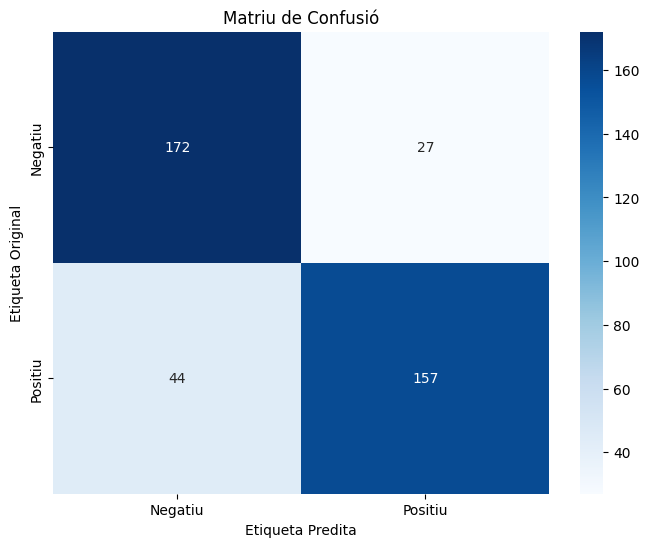

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Define las etiquetas de las clases
classes = ['Negatiu', 'Positiu']

# Crea la figura
plt.figure(figsize=(8, 6))

# Crea la matriz de confusión como un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Añade etiquetas y título
plt.xlabel('Etiqueta Predita')
plt.ylabel('Etiqueta Original')
plt.title('Matriu de Confusió')


# Muestra la matriz de confusión
plt.show()
